# CSE 601 Data Mining and Bioinformatics

# Project 2: Clustering Algorithms

# Part 2: Spectral Clustering

Description: This program conducts clustering algorithm on gene expressions datasets (cho.txt and iyer.txt) to find clusters of genes that exhibit similar expression profiles.

Submitted By:

Name: Karan Manchandia | UBIT: karanman | Person No.: 50290755

Name: Divya Srivastava | UBIT: divyasri | Person No.: 50290383

Name: Varsha Lakshman | UBIT: varshala | Person No.: 50288138

In [313]:
#Importing the libraries
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.cluster import SpectralClustering, KMeans
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.cm as mapcm
import matplotlib.pyplot as maplot
import math
from numpy import linalg as LA

In [314]:
# Enter the data file name, open it and assign it to the variable data_file
while True:
    try:
        my_file = input("Enter the name of the gene expression data file:")
        data_file = open(my_file)
        
    # In case of a error the except block will be executed
    except:
        print("Error: Could not find file or read data")
        continue
        
    # This block will be executed after correct data file name is entered
    else:
        print("Correct data file found and imported\n")
        print("----------------------------------------------------------------------------------------\n")
        break


data__file= np.loadtxt(my_file, delimiter = "\t", dtype=np.float)
impo_data = data__file[:,2:]
np.set_printoptions(suppress = False)

Enter the name of the gene expression data file:cho.txt
Correct data file found and imported

----------------------------------------------------------------------------------------



In [315]:
#Method to compute sigma if user doesn't provide it
def squared_exponential(x, y, sig, sig2):               
    norm = np.linalg.norm(x - y)
    dist = norm * norm
    return np.exp(- dist / (2 * sig * sig2))

In [316]:
#Giving choice to the user to input sigma
choice = input("Do you want to enter sigma (Y or N): ")
if choice == 'N' or choice =='n':
    #If choice is "No", then calculating the mean of the distances between two data points and set it as sigma value
    Y = impo_data.shape[0]
    W = np.zeros((Y, Y))
    sig = []
    for i in range(Y):
        dists = []
        for j in range(Y):
            dists.append(np.linalg.norm(impo_data[i] - impo_data[j]))
        dists.sort()
        sig.append(np.mean(dists[:5]))

    for i in range(Y):
         for j in range(Y):
            W[i][j] = squared_exponential(impo_data[i], impo_data[j], sig[i], sig[j])
    print(W)
else:
    #If choice is "yes", then inputting the value of sigma from the user and calculating the W matrix
    sigma = float(input("Enter sigma: "))
    N= len(impo_data)
    W = np.zeros((N, N))
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            distance = math.exp(-(np.linalg.norm(impo_data[i]-impo_data[j])**2)/(sigma**2))
            W[i][j] += distance

Do you want to enter sigma (Y or N): Y
Enter sigma: 10


In [317]:
# Degree matrix
temp_arr=W.sum(axis=1, dtype='float')
D= np.zeros((N, N), float)
np.fill_diagonal(D, temp_arr)

In [318]:
# laplacian matrix
L = D - W

In [319]:
#Calculating eigen values and eigen vectors. The eigen values obtained will be sorted
e, v = LA.eigh(L)

# eigenvalues
print('eigenvalues:')
print(e)

# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-5.96044969e-14  1.79556909e+02  2.90720364e+02  2.95949055e+02
  2.98340071e+02  3.06233362e+02  3.08957035e+02  3.09411495e+02
  3.11408460e+02  3.14232238e+02  3.16109635e+02  3.17391721e+02
  3.17579925e+02  3.18625055e+02  3.19562753e+02  3.19785685e+02
  3.20255825e+02  3.20482883e+02  3.20901487e+02  3.21176411e+02
  3.21298170e+02  3.22523125e+02  3.23554900e+02  3.23867938e+02
  3.23973517e+02  3.24041697e+02  3.24278285e+02  3.24549091e+02
  3.24818653e+02  3.24832475e+02  3.25113932e+02  3.25508908e+02
  3.25789121e+02  3.26025742e+02  3.26688503e+02  3.27526252e+02
  3.28505172e+02  3.28594467e+02  3.29127660e+02  3.29494318e+02
  3.29816814e+02  3.30010528e+02  3.30180016e+02  3.30600196e+02
  3.30743892e+02  3.31040730e+02  3.31297192e+02  3.31449944e+02
  3.31705713e+02  3.31916519e+02  3.32022270e+02  3.32440795e+02
  3.32509874e+02  3.33081284e+02  3.33344326e+02  3.33599833e+02
  3.33785682e+02  3.33839297e+02  3.33890609e+02  3.34010490e+02
  3.34085477

In [320]:
#Calculating the eigengap
temp=[]
for i in range (len(e)-1):
    gap = abs(e[i]-e[i+1])
    temp.append(gap)
maxi=0
for q, value in enumerate(temp):
    if value > maxi:
        maxi=value
        index = q
eigengap= index + 2
k_gap= eigengap
print(f"Eigen gap calculated for sigma value {sigma} is: {k_gap}")       

Eigen gap calculated for sigma value 10.0 is: 2


In [321]:
# Taking input from the user for the total number of centroids
while True:
    try:
        K = int(input("Enter the total number of centroids:\n"))
        
    # In case of a error(such as entering a string insterd of number) the except block will be executed
    except:
        print("Error: Please enter a number(int)")
        continue
        
    # This block will be executed after correct centroid number is entered
    else:
        print("\nTotal number of centroids is set to be {}".format(K))
        break
    

Enter the total number of centroids:
5

Total number of centroids is set to be 5


In [322]:
# First "n_clusters" eigen vectors as input to kmeans
k_mean_input= np.array(v[:,:k_gap])

In [323]:
#Giving choice to either input the initial cluster centre indices or selecting the first K cluster centers as per the user's choice 
cent = input("Do you want to enter initial centroids (Y or N): ")
if cent == 'N' or cent =='n':
    #Inputting the number of centroids and creating a numpy array of centroids with first K data elements, if choice is 'No'
    centroid = []
    for i in range(K):
        centroid.append(k_mean_input[i])
    centroids= np.asarray(centroid)
else:
    #Inputting the initial centre indices from the user if the choice is 'Yes'
    cent_indices = input("Enter initial centers indices: ")
    centroids = k_mean_input[np.asarray(cent_indices.split(',')).astype(int)-1,:].astype(float)
# Setting 'K' as the number of centroids
K = len(centroids)
print(centroids)
print("No. of centroids, K = "+str(len(centroids)))


Do you want to enter initial centroids (Y or N): Y
Enter initial centers indices: 1,3,5,7,9
[[-0.05089866  0.00227186]
 [-0.05089866  0.00255063]
 [-0.05089866  0.00230806]
 [-0.05089866  0.00242464]
 [-0.05089866  0.00247499]]
No. of centroids, K = 5


In [324]:
#Executing KMeans on the reduced dataset as per the first "n_clusters" eigen-vectors. Inputs are number of centroids "K" and initial centroid values
km = KMeans(init=centroids, n_clusters=K)
km.fit(k_mean_input)
print("The cluster labels for each data points are: ")
print(km.labels_)
print("The final centroid values are: ")
print(km.cluster_centers_)


The cluster labels for each data points are: 
[3 4 4 3 3 3 3 4 4 3 4 2 3 3 4 3 3 4 4 3 4 3 4 3 4 1 3 1 4 2 4 4 3 3 3 1 4
 4 3 3 3 2 3 4 3 3 3 3 4 4 4 3 4 3 4 3 4 4 3 3 4 4 4 4 4 2 4 1 1 1 1 1 1 1
 1 1 1 4 4 1 1 4 1 4 4 4 4 1 4 1 1 1 1 1 1 4 4 1 1 4 4 1 1 1 4 1 1 1 1 4 1
 4 1 1 4 1 4 1 1 1 1 1 1 1 4 1 4 4 4 4 1 4 4 3 1 4 4 4 1 4 1 4 4 4 4 3 4 4
 1 4 1 1 1 1 4 1 1 1 1 1 1 4 1 4 1 1 1 4 1 4 4 1 4 4 1 3 4 4 1 4 3 1 4 4 4
 4 4 3 4 3 4 1 4 4 1 4 1 4 4 4 4 4 3 4 4 4 4 4 4 3 2 4 4 4 1 4 3 4 4 3 3 3
 4 4 4 4 3 1 3 4 1 4 4 4 4 4 3 4 3 4 4 4 3 4 4 1 1 4 4 4 3 1 1 3 4 3 3 4 4
 3 1 4 4 4 4 4 4 3 1 4 4 1 1 4 4 4 4 3 3 2 3 3 2 2 3 3 4 3 4 3 3 3 4 4 3 3
 3 4 4 3 3 4 3 2 3 3 3 3 3 3 4 4 2 3 3 3 3 3 2 2 3 3 4 3 3 3 3 4 4 3 3 3 2
 2 2 2 3 2 2 3 3 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 2 2 3 4
 3 2 2 3 2 2 3 2 3 2 2 3 3 0 3 2]
The final centroid values are: 
[[-5.08986599e-02 -9.98572818e-01]
 [-5.08986599e-02  3.61129195e-03]
 [-5.08986599e-02  9.50927587e-04]
 [-5.08986599e-02  2.09013512e-03

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [325]:
#Calculating the unique clusters values for plotting purpose
index_clstr_unq = []
for item5 in km.labels_:
    if item5 not in index_clstr_unq:
        index_clstr_unq.append(item5)
index_clstr_unq.sort()
print("Unique index values: ")
print(index_clstr_unq)

Unique index values: 
[0, 1, 2, 3, 4]


In [326]:
#Applying PCA for feature reduction to 2 dimensions on original data
pca_set = PCA(n_components=2, svd_solver='full')
pca_set.fit(impo_data)
new_factors = pca_set.transform(impo_data)

In [327]:
#Calculating ground truth matrix
data_file2 = data__file[:,1].astype(int)
gt_matrix = np.zeros((len(data_file2),len(data_file2)))
for i in range(len(data_file2)):
    for j in range(len(data_file2)):
        val = 1 if (data_file2[i]==data_file2[j]) else 0
        gt_matrix[i][j] = val

In [328]:
#Calculating clustering index matrix
classes = km.labels_.astype(int)
inc_matrix = np.zeros((len(classes),len(classes)))

for i in range(len(classes)):
    for j in range(len(classes)):
        val = 1 if (classes[i]==classes[j]) else 0
        inc_matrix[i][j] = val
cluster_matrix = inc_matrix

In [329]:
# Deriving the dimension parameters from cluster matrix and ground truth matrix for external index calculation
f11 = f00 = f10 = f01 = 0.0
for i in range(len(gt_matrix)):
    for j in range(len(gt_matrix)):
        if gt_matrix[i][j] == cluster_matrix[i][j]:
            if gt_matrix[i][j] == 1:
                f11 += 1
            else:
                f00 += 1
        else:
            if gt_matrix[i][j] == 1:
                f10 += 1
            else:
                f01 += 1


#Calculating the Jaccard and Rand coefficients using the calculated dimension values for validation of results
Jaccard= str(f11/(f11 + f10 + f01))  
Rand= str((f11 + f00)/(f11 + f00 + f10 + f01))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

The file name is: cho.txt
The number of centroids i.e. cluster centers are: 5
Sigma is: 10.0
Initial centroids are: 
[[-0.05089866  0.00227186]
 [-0.05089866  0.00255063]
 [-0.05089866  0.00230806]
 [-0.05089866  0.00242464]
 [-0.05089866  0.00247499]]
New updated centroids after k means application: 
[[-5.08986599e-02 -9.98572818e-01]
 [-5.08986599e-02  3.61129195e-03]
 [-5.08986599e-02  9.50927587e-04]
 [-5.08986599e-02  2.09013512e-03]
 [-5.08986599e-02  2.84703937e-03]]
The RAND coefficient is: 0.6831727026228892
The JACCARD coefficient is: 0.24792888095845017


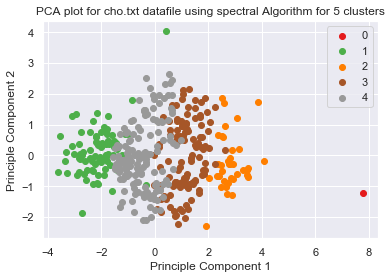

In [330]:
# Generating variable number of colors
var_col = mapcm.Set1(np.linspace (0,1,len(index_clstr_unq)))

# # Plotting the final dataframe with disease names
plot1 = maplot.figure()
plot11 = plot1.add_subplot(111)

# Taking first and second columns from new_factors()
first_col = new_factors[:,0]
second_col = new_factors[:,1]

# Calculating the coordinates for the plot
for x, y in enumerate(index_clstr_unq):
    temp_a = []
    temp_b = []
    
    # Populating temp_a list
    for (m,n) in enumerate(first_col):
        if km.labels_[m] == y:
            temp_a.append(n)
            
    # Populating temp_b list
    for (m,n) in enumerate(second_col):
        if km.labels_[m] == y:
            temp_b.append(n)
    
    # Converting labels to string
    l = str(int(y))
    
    # Plotting the graph
    plot11.scatter(temp_a,temp_b, c=var_col[x], label=l)
    
#giving the location of the legend as "best"
#This would place the legend at the location in the graph that would overcover minimum data points
plot11.legend(loc='best')

# Giving X axis label
plot11.set_xlabel('Principle Component 1')

# Giving the title for the graph
plot11.set_title(f"PCA plot for {my_file} datafile using spectral Algorithm for {K} clusters")

# Giving Y axis label
plot11.set_ylabel('Principle Component 2')

# Saving the scatter plot as a PDF file
# maplot.savefig(f"PCA plot for {my_file} datafile using HAC Algorithm for {no_of_clusters} clusters")

#Displaying the results
print(f"The file name is: {my_file}")
print(f"The number of centroids i.e. cluster centers are: {K}")
print(f"Sigma is: {sigma}")
print(f"Initial centroids are: ")
print(centroids)
print(f"New updated centroids after k means application: ")
print(km.cluster_centers_)
print(f"The RAND coefficient is: {Rand}")
print(f"The JACCARD coefficient is: {Jaccard}")